In [29]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split

### To do: develop an accurate simple neural network model for spam classification (no LSTM, CNN, etc.)

In [30]:
#Read csv file
data_spam = pd.read_csv('spam.csv',encoding='latin-1')

In [31]:
#Filtering data
data_spam = data_spam.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data_spam = data_spam.rename(columns={"v1":'label', "v2":'text'})
data_spam['number_label'] = data_spam['label'].map({'ham':0,'spam':1})

In [32]:
#Show dataset preview
data_spam.head()

,label,text,number_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<AxesSubplot:xlabel='label', ylabel='count'>

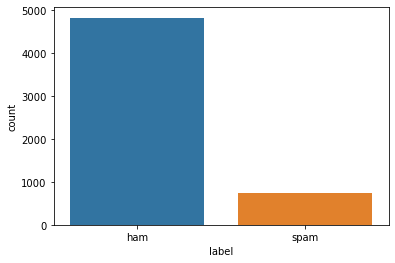

In [33]:
#Plot the diagram
sns.countplot(x=data_spam['label']) 

<AxesSubplot:ylabel='count'>

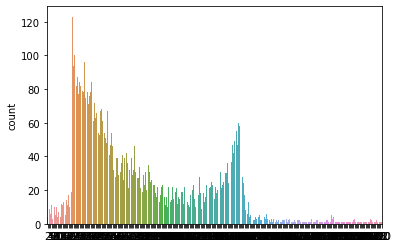

In [34]:
sns.countplot(x=[len(data_spam.loc[i]['text']) for i in range(len(data_spam))])

In [35]:
#Checking data distribution
text_words_lengths = [len(data_spam.loc[i]['text'].split()) for i in range(0, len(data_spam))]
total_length = np.sum(text_words_lengths)
text_words_mean = int(np.mean(text_words_lengths))
print('The total number of words in the Dataframe is' + str(total_length))
print('Average word count in each sentence is equal to ' + str(text_words_mean))
text_words_lengths[:5], total_length, text_words_mean

The total number of words in the Dataframe is86335
Average word count in each sentence is equal to 15


([20, 6, 28, 11, 13], 86335, 15)

In [36]:
#Split the data
X, Y = np.asanyarray(data_spam['text']), np.asanyarray(data_spam['number_label'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)
len(X_train), len(X_test), X_train[:2], Y_train[:2]

(4457,
 1115,
 array(['Yo you guys ever figure out how much we need for alcohol? Jay and I are trying to figure out how much we can safely spend on weed',
        'Its ok..come to my home it vl nice to meet and v can chat..'],
       dtype=object),
 array([0, 0], dtype=int64))

In [37]:
#Use of tokens
MAXTOKENS = total_length
OUTPUTLEN = text_words_mean

text_vec = layers.TextVectorization(max_tokens=MAXTOKENS, standardize='lower_and_strip_punctuation', output_mode='int',
                                    output_sequence_length=OUTPUTLEN)

text_vec.adapt(X_train)

In [38]:
#Embed layer
embedding_layer = layers.Embedding(input_dim=MAXTOKENS, output_dim=128, embeddings_initializer='uniform', input_length=OUTPUTLEN)

In [39]:
# Input layer
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)

In [40]:
#Model
model_spam = keras.Model(input_layer, output_layer)

In [42]:
#Compile the Model
model_spam.compile(loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5), optimizer= keras.optimizers.Adam(), metrics=['accuracy'])

In [43]:
#Train the Model
history = model_spam.fit(X_train, Y_train, epochs=50, batch_size=450, validation_data=(X_test, Y_test), validation_steps=int(0.2 * len(X_test)))

Epoch 1/50
10/10 [==============================] - 5s 370ms/step - loss: 0.6777 - accuracy: 0.8638 - val_loss: 0.6613 - val_accuracy: 0.8700
Epoch 2/50
10/10 [==============================] - 1s 141ms/step - loss: 0.6461 - accuracy: 0.8652
Epoch 3/50
10/10 [==============================] - 1s 142ms/step - loss: 0.6127 - accuracy: 0.8726
Epoch 4/50
10/10 [==============================] - 1s 139ms/step - loss: 0.5941 - accuracy: 0.8932
Epoch 5/50
10/10 [==============================] - 1s 143ms/step - loss: 0.5875 - accuracy: 0.9367
Epoch 6/50
10/10 [==============================] - 2s 151ms/step - loss: 0.5813 - accuracy: 0.9684
Epoch 7/50
10/10 [==============================] - 2s 155ms/step - loss: 0.5760 - accuracy: 0.9843
Epoch 8/50
10/10 [==============================] - 2s 151ms/step - loss: 0.5717 - accuracy: 0.9881
Epoch 9/50
10/10 [==============================] - 2s 157ms/step - loss: 0.5689 - accuracy: 0.9910
Epoch 10/50
10/10 [==============================] - 1s 14

In [44]:
#Evaluate the Model
loss, accuracy = model_spam.evaluate(X_test, Y_test, verbose=False)
print("Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_spam.evaluate(X_test, Y_test, verbose=False)
print("Loss: {:.4f}".format(loss))

Accuracy: 0.9758
Loss: 0.5738


In [46]:
#Output csv
data_spam.to_csv("Agbayani_spam_output.csv")